In [73]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from simulation import run_interferom_simulation, dist_to_state

from numeric_truncated_unitaries import numeric_truncated_unitary
from direct_decomposition import direct_decomposition, compile_unitary
from random import random
from qiskit.quantum_info import Operator

In [74]:
def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), np.conjugate(np.transpose(m)) @ m)

# Useful diagnostics, don't delete

# R = random_unitary(3)
# assert(is_unitary(R))
# I = itf.square_decomposition(R)
# T = I.calculate_transformation()

# print(R)
# print("\n")
# assert(is_unitary(R))
# assert(np.allclose(R,T))

[
 Beam splitter between modes 1 and 2: 
 Theta angle: 1.27 
 Phase: 2.78, 
 Beam splitter between modes 2 and 3: 
 Theta angle: 0.35 
 Phase: 1.98]


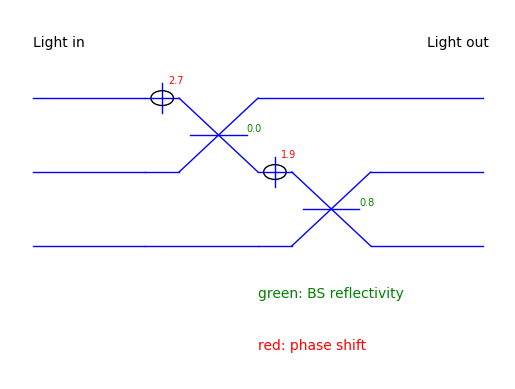

In [75]:
"""
Some notes:
    theta = 0 -> reflective.
    theta = pi/2 -> transparent
    R = 0 -> transparent
    R = 1 -> reflective
"""

I = itf.Interferometer()

theta_1 = np.pi/2 * random()
phi_1 = np.pi * random()
theta_2 = np.pi/2 * random()
phi_2 = np.pi * random()

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)
BS2 = itf.Beamsplitter(2, 3, theta=theta_2, phi=phi_2)

I.add_BS(BS1)
I.add_BS(BS2)

print(I.BS_list)
I.draw()

In [76]:
R=I.calculate_transformation()
print(R)
is_unitary(R)

[[-0.27942734+0.10538395j -0.95436607+0.j          0.        +0.j        ]
 [ 0.04588946-0.89535968j -0.11230419+0.2570837j  -0.34281327+0.j        ]
 [ 0.01674628-0.32674049j -0.04098278+0.09381666j  0.93940357+0.j        ]]


True

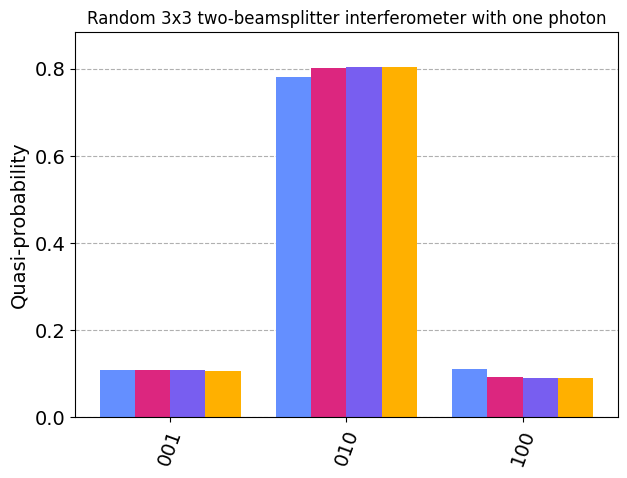

In [77]:
initial_dist = [1,0,0]
possible_dists = [[1,0,0], [0,1,0], [0,0,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    assert(is_unitary(R))
    # prob = output_probability([1,0,0], dist, R)
    # This is what was going wrong I was putting in incorrect arguments
    # I was iterating over output distributions, not input distributions!
    prob = output_probability(initial_dist, dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], 
               title='Random 3x3 two-beamsplitter interferometer with one photon', bar_labels=False)

## 2 photon experiment

{'100000': 0.00795403798434111, '001000': 0.6460539332499226, '000010': 0.0114575153395069, '010100': 0.14336997628517434, '010001': 0.01909277478174493, '000101': 0.1720717623593105}


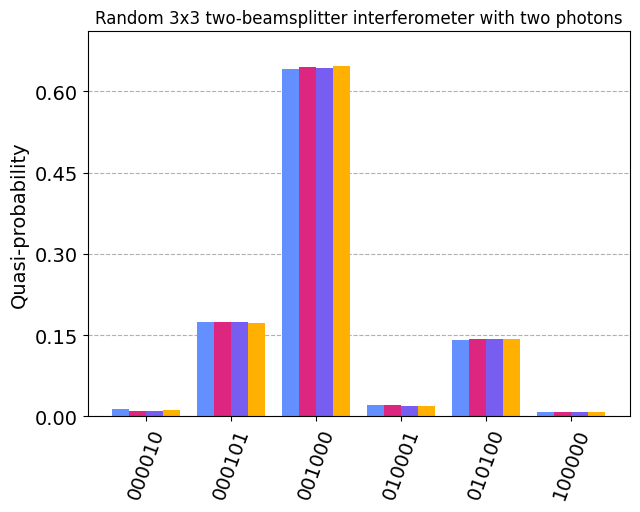

In [78]:
initial_dist = [2,0,0]
possible_dists = [[2,0,0], [0,2,0], [0,0,2], [1,1,0], [1,0,1], [0,1,1]] # Every configuration of 1 photon in 3 modes

analytic_probs = dict()
for dist in possible_dists:
    assert(is_unitary(R))
    # prob = output_probability([1,0,0], dist, R)
    prob = output_probability(initial_dist, dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], 
               title='Random 3x3 two-beamsplitter interferometer with two photons', bar_labels=False)

# Reverse two knit test

In [79]:
# I = itf.Interferometer()

# theta_1 = np.pi/2 * random()
# phi_1 = np.pi * random()
# theta_2 = np.pi/2 * random()
# phi_2 = np.pi * random()

# BS1 = itf.Beamsplitter(2, 3, theta=theta_1, phi=phi_1)
# BS2 = itf.Beamsplitter(1, 2, theta=theta_2, phi=phi_2)

# I.add_BS(BS1)
# I.add_BS(BS2)

# print(I.BS_list)
# I.draw()

In [80]:
# R=I.calculate_transformation()
# print(R)
# is_unitary(R)

# initial_dist = [1,0,0]
# possible_dists = [[1,0,0], [0,1,0], [0,0,1]] # Every configuration of 1 photon in 3 modes

# analytic_probs = dict()
# for dist in possible_dists:
#     assert(is_unitary(R))
#     # prob = output_probability([1,0,0], dist, R)
#     # This is what was going wrong I was putting in incorrect arguments
#     # I was iterating over output distributions, not input distributions!
#     prob = output_probability(initial_dist, dist, R)
#     state = dist_to_state(dist)
#     analytic_probs[state] = prob

# print(analytic_probs)

In [81]:
# probs_1e3 = run_interferom_simulation(R, initial_dist, 1e3)
# probs_1e4 = run_interferom_simulation(R, initial_dist, 1e4)
# probs_1e5 = run_interferom_simulation(R, initial_dist, 1e5)

# legend = ['Shots = 1e3','Shots = 1e4','Shots = 1e5', 'Analytic results']
# plot_histogram([probs_1e3, probs_1e4, probs_1e5, analytic_probs], 
#                title='Random 3x3 interferometer with one photon', bar_labels=False)